![](http://www.divinocorazon.edu.ar/images/Slide_UTN.jpg)
# Ejemplo de efectos de saturación
Se emplea una señal senoidal y una de audio para evaluar los efectos de saturar o no la señal.
> Aspectos importantes
- El diseño que realizaron ustedes es HARDWARE, se emplea software en esta ocación para ver los efectos de forma grafica y sonora.
- En el segundo cuatrimestre materializaremos el circuito y repetiremos estas pruebas si les interesa
- Uso python por lo sencillo que es compartir los resultados
    1. no tiene que sabe python, solo apretar el boton RUN en el panel superior
    2. no programamos en este curso, lo más cercano es describir HW mediante lenguajes de descripción 
            
            # que no se preste a confusión

In [1]:
import numpy as np 
import wave 
import os
import struct 
import matplotlib.pyplot as plt

# archivo de audio (tono puro)

In [2]:
fs = 44100.0 
infile = "senoidal.wav" 
n = 44100 
wav_file = wave.open(infile, 'r') 
data = wav_file.readframes(n) 
wav_file.close()

- genero array de datos leidos

In [3]:
data = struct.unpack('{n}h'.format(n=n), data)
data = np.array(data)

In [4]:
print("La información está entre los valores:")
print(data.min())
print(" y ")
print(data.max())

La información está entre los valores:
-32766
 y 
32766


*recordar que la numeración en CCa2 de 16 bits comprende los valores entre:
 -   -32768 y 32767
 - por lo cual, efectivamente, el audio esta en CCa2, lo cual es un standar

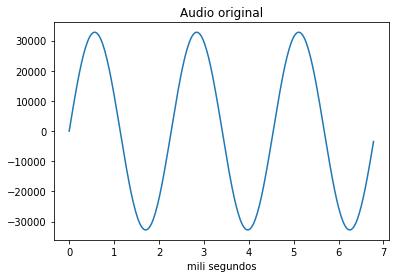

In [5]:
time=np.arange(n)*(1/fs)
plt.plot(time[:300]*1000,data[:300]) 
plt.title("Audio original")
plt.xlabel("mili segundos")
plt.show()

# Saturación

In [6]:
# defino la función de saturación
def saturador(data,sup_lim,inf_lim):
    saturado = np.zeros((n,), dtype=int)
    for x in range(n):
        if data[x]>sup_lim:
            saturado[x] = sup_lim
        elif data[x]<inf_lim:
            saturado[x] = inf_lim
        else: 
            saturado[x] = data[x]
    return saturado

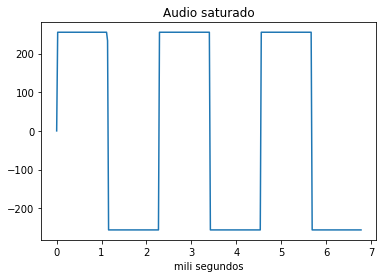

In [7]:
sup_lim = ((2**8)-1)
inf_lim = -(2**8)
saturado=saturador(data,sup_lim,inf_lim)
plt.plot(time[:300]*1000,saturado[:300]) 
plt.title("Audio saturado")
plt.xlabel("mili segundos")
plt.show()

### caso más realista
Tomamos el audio escalado a valores que superan nuestra nueva numeración en 8 bits levemente para cer un efecto menos grosero

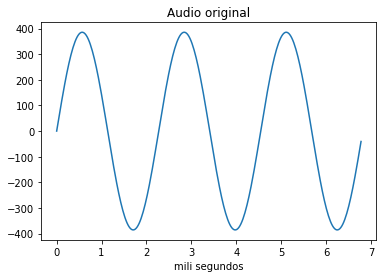

In [8]:
at=3/sup_lim
data2=data*at

plt.plot(time[:300]*1000,data2[:300]) 
plt.title("Audio original")
plt.xlabel("mili segundos")
plt.show()

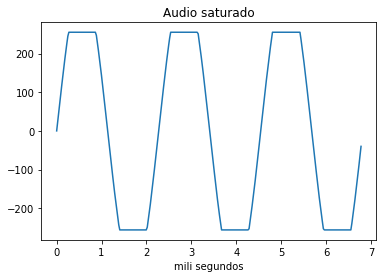

In [9]:
saturado=saturador(data2,sup_lim,inf_lim)

plt.plot(time[:300]*1000,saturado[:300]) 
plt.title("Audio saturado")
plt.xlabel("mili segundos")
plt.show()

# Desborde
### para el caso de no considerar la saturación basta con enmastacar
> Esto en este tipo de logica PROGRAMADA

In [10]:
# defino la función de desborde
def desborde(data):
    desborde = np.zeros((n,), dtype=int)

    for x in range(n):
        desborde[x] = int (bin( 255 & int(data[x]) ),2)
    return desborde    

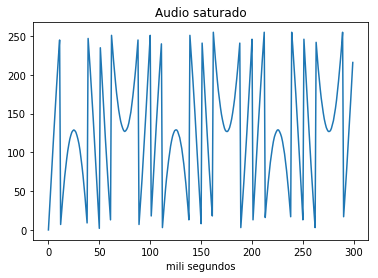

In [11]:
desborde=desborde(data2)

plt.plot(desborde[:300]) 
plt.title("Audio saturado")
plt.xlabel("mili segundos")
plt.show()

- guardo los resultados en archivos de audio para la comparación sonora

In [21]:
file1 = "desborde.wav"
file2 = "saturado.wav"
nframes=n 
comptype="NONE" 
compname="not compressed" 
nchannels=1 
sampwidth=2 #bites

wav_file1=wave.open(file1, 'w')
wav_file2=wave.open(file2, 'w')

wav_file1.setparams((nchannels, sampwidth, int(fs), nframes, comptype, compname))
wav_file2.setparams((nchannels, sampwidth, int(fs), nframes, comptype, compname))

for s in desborde:
   wav_file1.writeframes(struct.pack('h', int(s/at)))

for s in saturado:
   wav_file2.writeframes(struct.pack('h', int(s/at)))

# Revisión sonora de resultados
### En ocaciones el efecto indeseado en un circuito puede o no ser aceptable. en señales de audio, facilmente llegamos al receptor (el oido) y de esa forma definiremos que tan problematico es. Esto no es valido en muchisimas otras aplicaciones.
> hasta el momento se generaron los archivos de audio de salida 

> se pueden escuchar mediante este codigo o desde el archivo

In [14]:
fileD = "desborde.wav"
fileS = "saturado.wav"
os.system("vlc " + fileD) #cambiar por reproductor preferido 

0

### caso más interesante
* probemos ambos casos con un audio un poco más complejo (y real)

In [29]:
at = 2/sup_lim
infile = "audio.wav" 
wav_file = wave.open(infile, 'r') 
n=wav_file.getnframes()
fs=wav_file.getframerate()
audio = wav_file.readframes(n) 
wav_file.close()
audio = struct.unpack('{n}h'.format(n=n), audio)
audio = np.array(audio)
audio = audio*at

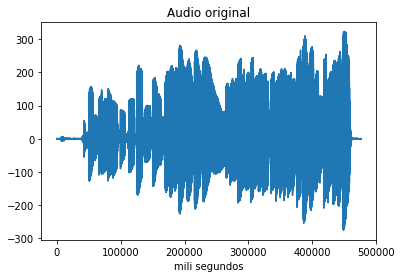

In [25]:
plt.plot(audio) 
plt.title("Audio original")
plt.xlabel("mili segundos")
plt.show()

In [30]:

saturado=saturador(audio,sup_lim,inf_lim)
desborde = np.zeros((n,), dtype=int)

for x in range(n):
    desborde[x] = int (bin( 255 & int(audio[x]) ),2)
    

file1="audio_desbordado.wav"
file2="audio_saturado.wav"

wav_file1=wave.open(file1, 'w')
wav_file2=wave.open(file2, 'w')

wav_file1.setparams((nchannels, sampwidth, int(fs), nframes, comptype, compname))
wav_file2.setparams((nchannels, sampwidth, int(fs), nframes, comptype, compname))

for s in desborde:
   wav_file1.writeframes(struct.pack('h', int(s/at)))

for s in saturado:
   wav_file2.writeframes(struct.pack('h', int(s/at)))

In [32]:
fileO = "audio.wav"
fileD = "audio_desbordado.wav"
fileS = "audio_saturado.wav"
os.system("vlc " + fileD) #cambiar por reproductor preferido 

0